In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI

In [2]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):
    messages : Annotated[list[BaseMessage], add_messages]

In [ ]:
llm = ChatOpenAI()
def chat_node(state: ChatState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {'messages':[response]}


In [6]:
graph = StateGraph(ChatState)
graph.add_node('chat_node', chat_node)
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile()
               

In [7]:
initial_sate = {
    'messages': [HumanMessage(content='What is the capital of India')]
}
chatbot.invoke(initial_sate)['messages'][-1].content

NameError: name 'llm' is not defined

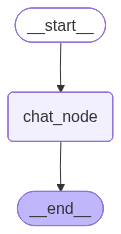

In [8]:
from IPython.display import Image
Image(chatbot.get_graph().draw_mermaid_png())